In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
dw=pd.read_csv("ht_wt.csv")
dw.head(4)


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145


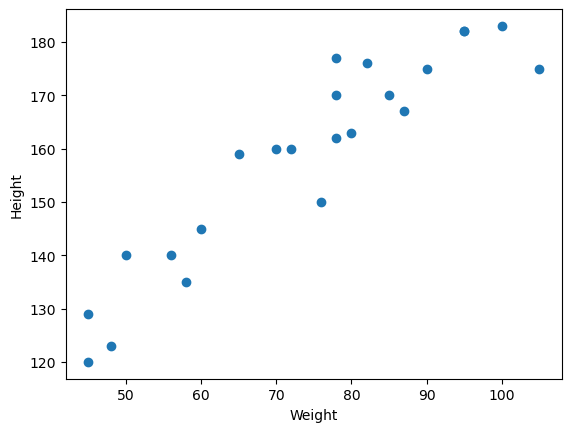

In [22]:
plt.scatter(dw["Weight"],dw["Height"])

plt.xlabel("Weight")
plt.ylabel("Height")    
plt.show()

In [11]:
dw.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


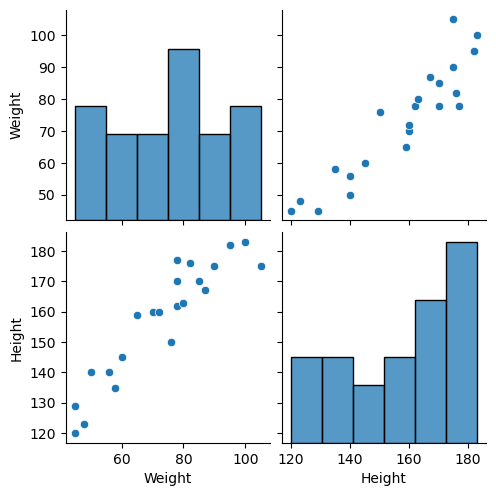

In [23]:
import seaborn as sq
sq.pairplot(dw)
plt.show()

In [24]:
dw

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [25]:
dw.head(3)

,Weight,Height
0,45,120
1,58,135
2,48,123


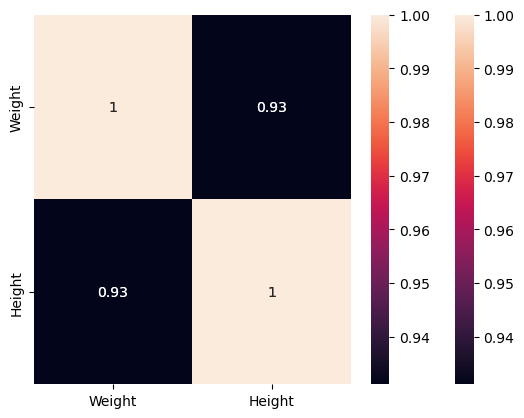

In [27]:
import seaborn as sns
sns.heatmap(dw.corr(),annot=True)
plt.show()



In [30]:
x=dw[["Weight"]]
y=dw["Height"]
x.shape


(23, 1)

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [67]:
x_train.shape


(17, 1)

In [70]:
dw

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [71]:
y_train

1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

In [72]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

In [73]:
x_train

,Weight
1,58
13,100
5,78
2,48
11,95
20,45
3,60
4,70
18,76
16,50


In [74]:
x_test

,Weight
15,78
9,78
0,45
8,95
17,65
12,105


In [115]:
#Standardadization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [118]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print("The intercept is:",model.intercept_)
print("The coefficient is:",model.coef_) 


The intercept is: 156.47058823529412
The coefficient is: [17.2982057]


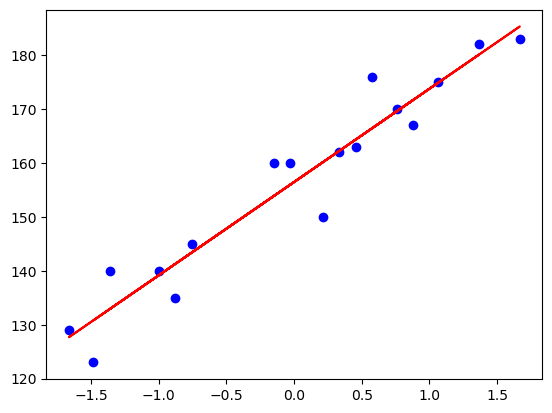

In [152]:
plt.plot(x_train,model.predict(x_train),color='red')
plt.scatter(x_train,y_train,color='blue')
plt.show()

In [122]:
y_pred=model.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [133]:
##Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mt=mean_squared_error(y_pred,y_test)
print("Mean squared error=",mt)
ma=mean_absolute_error(y_pred,y_test)
print("Mean absolute error=",ma)
r2=r2_score(y_test,y_pred)
print("R2 score=",r2)
rmse=np.sqrt(mt)
print("Root mean squared error=",rmse)

Mean squared error= 114.84069295228699
Mean absolute error= 9.665125886795005
R2 score= 0.7360826717981276
Root mean squared error= 10.716374991212605


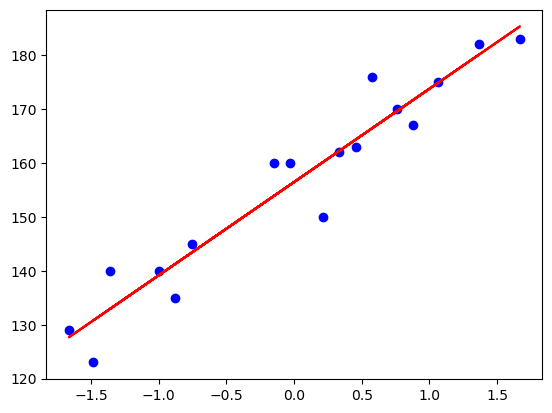

In [154]:
plt.plot(x_train,model.predict(x_train),color='red')
plt.scatter(x_train,y_train,color='blue')
plt.show()  

In [157]:
# Scale the input feature
scaled_input = scaler.transform([[72]])   # [[72]] keeps it 2D

# Predict with the trained model
prediction = model.predict(scaled_input)

print("Scaled input =", scaled_input)   # this will show the standardized value
print("Prediction =", prediction)       # this will show the model's output


Scaled input = [[72.]]
Prediction = [1401.94139895]
